# Step 2 Cis effect 

This notebook graphs the cis effect of copy number and proteomics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
#sys.path.append('C:\\Users\\brittany henderson\\GitHub\\GBM_for_CPTAC\\')
#import cis_functions as f

import cptac
import cptac.utils as u
import plot_utils as p

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [9]:
def plot_pearson(df1,x_axis, y_axis, hue = "none", title = "", ra_stats = False, show_plot = True, save_file_name = "file_name"):
    #format dfs 
    if hue != "none":   
        df1_subset = df1[[x_axis,y_axis,hue]]
        #df1_subset.columns = df1_subset.columns.droplevel(1)
        #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
        df1_subset = df1_subset.dropna(axis=0, how="any")

        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
        corr, pval = scipy.stats.pearsonr(x1,y1)

        sns.set(style="darkgrid")
        plt.rcParams["figure.figsize"] = (30,22)
        graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
        sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
        graph.set(title = title)
    if hue == "none":
        
        df1_subset = df1[[x_axis,y_axis]]
        #df1_subset.columns = df1_subset.columns.droplevel(1)
        #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
        df1_subset = df1_subset.dropna(axis=0, how="any")

        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
        corr, pval = scipy.stats.pearsonr(x1,y1)

        sns.set(style="darkgrid")
        plt.rcParams["figure.figsize"] = (30,22)
        graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, fit_reg=False)
        sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
        graph.set(title = title)
    
    if ra_stats:
     
       
        pval = myTrunc(pval,19)
        corr = myTrunc(corr,3)
        #"Slope of regression: %s\nR-squared: %s\nPvalue: %s" %
        plt.text(-0.2,.8, "Correlation: %s\nPvalue: %s"%(corr,pval))
        
    if save_file_name != "file_name":
        
        #plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png')
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()

In [4]:
#Load cptac data sets
brain = cptac.Gbm()
kidney = cptac.Ccrcc()
Ovar = cptac.Ovarian()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Hnscc = cptac.Hnscc()
Lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 8)


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 9)


# Step 1 Create Data Frame

For each cancer type create a df that combines proteomics and CNV. Then merge clinical dataframe and filter df to only have tumor samples. 

# Step 2  Call Plotting Function

# GBM

In [5]:
prot_CNV = brain.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
mutation = brain.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
subtype = brain.get_derived_molecular()
subtype = subtype[["rna_wang_cancer_cell_2017"]]
subtype = subtype.rename(columns={"rna_wang_cancer_cell_2017": "GBM_Subtype"})
cnv_subtype = pd.merge(prot_CNV_Tumor, subtype, on = "Patient_ID", how = "outer")

cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834, PT-NPJ7.N, PT-P44H.N, PT-Q2AG.N, PT-QVJO.N, PT-R55F.N, PT-RN5K.N, PT-RU72.N, PT-UTHO.N, PT-WVLH.N, PT-Y8DK.N (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


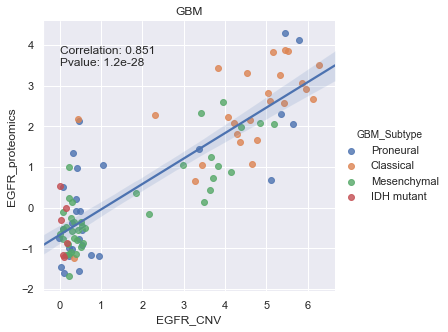

In [12]:
plot_pearson(cnv_subtype,"EGFR_CNV","EGFR_proteomics", hue = "GBM_Subtype", ra_stats = True, title = "GBM" ,show_plot = True, save_file_name = "png_files/Step2Cis_Gbm")

# Kidney 

In [8]:
prot_CNV = kidney.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV.columns = prot_CNV.columns.droplevel(1) #drop multi-index level
mutation = kidney.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]


cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00004.N, C3L-00010.N, C3L-00011.N, C3L-00026.N, C3L-00079.N, C3L-00088.N, C3L-00096.N, C3L-00097.N, C3L-00103.N, C3L-00183.N, C3L-00360.N, C3L-00369.N, C3L-00416.N, C3L-00418.N, C3L-00447.N, C3L-00448.N, C3L-00561.N, C3L-00581.N, C3L-00583.N, C3L-00606.N, C3L-00607.N, C3L-00791.N, C3L-00814.N, C3L-00902.N, C3L-00907.N, C3L-00908.N, C3L-00910.N, C3L-00917.N, C3L-01281.N, C3L-01286.N, C3L-01287.N, C3L-01302.N, C3L-01313.N, C3L-01603.N, C3L-01607.N, C3L-01836.N, C3L-01861.N, C3L-01882.N, C3L-01885.N, C3N-00148.N, C3N-00149.N, C3N-00150.N, C3N-00168.N, C3N-00177.N, C3N-00194.N, C3N-00242.N, C3N-00244.N, C3N-00246.N, C3N-00310.N, C3N-00312.N, C3N-00314.N, C3N-00317.N, C3N-00320.N, C3N-00390.N, C3N-00435.N, C3N-00437.N, C3N-00491.N, C3N-00492.N, C3N-00494.N, C3N-00495.N, C3N-00573.N, C3N-00577.N, C3N-00646.N, C3N-00733.N, C3N-00831.N, C3N-00834.N, C3N-00852.N, C3N-

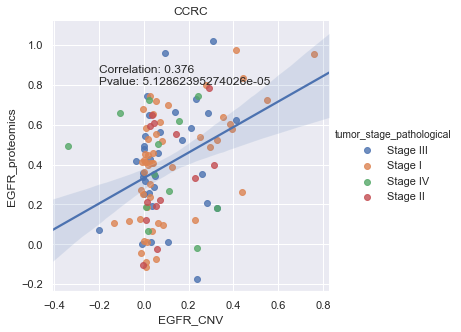

In [10]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue ="tumor_stage_pathological", title = "CCRC", ra_stats = True, show_plot = True, save_file_name = "png_files/Step2Cis_Kidney")

# Ovarian 

In [36]:
prot_CNV = Ovar.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV.columns = prot_CNV.columns.droplevel(1) #drop multi-index level
mutation = Ovar.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
mutation

cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 01OV007.N, 01OV008.N, 01OV010.N, 01OV013.N, 01OV017.N, 01OV019.N, 01OV023.N, 01OV029, 01OV029.N, 01OV039.N, 02OV001.N, 02OV015, 11OV002.N, 11OV010.N, 14OV011.N, 14OV029.N, 15OV001.N, 17OV001.N, 17OV002.N, 17OV003.N, 17OV004.N, 17OV005.N (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01OV002, 01OV008, 01OV010, 01OV013, 01OV019, 01OV045, 01OV046, 01OV049, 02OV035, 02OV040, 02OV042, 02OV045, 04OV041, 11OV009, 13OV004, 17OV019, 17OV034, 22OV001, 26OV010 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


Name,Sample_Tumor_Normal,Participant_Procurement_Age,Participant_Gender,Participant_Race,Participant_Ethnicity,Participant_Jewish_Heritage,Participant_History_Malignancy,Participant_History_Chemotherapy,Participant_History_Neo-adjuvant_Treatment,Participant_History_Radiation_Therapy,Participant_History_Hormonal_Therapy,Aliquots_Plasma,Blood_Collection_Time,Blood_Collection_Method,Anesthesia_Time,Tumor_Surgical_Devascularized_Time,Tumor_Sample_Number,Tumor_Sample_1_Weight,Tumor_Sample_1_LN2_Time,Tumor_Sample_1_Ischemia_Time,Tumor_Sample_2_Weight,Tumor_Sample_2_LN2_Time,Tumor_Sample_2_Ischemia_Time,Tumor_Sample_3_Weight,Tumor_Sample_3_LN2_Time,Tumor_Sample_3_Ischemia_Time,Tumor_Sample_4_Weight,Tumor_Sample_4_LN2_Time,Tumor_Sample_4_Ischemia_Time,Tumor_Sample_5_Weight,Tumor_Sample_5_LN2_Time,Tumor_Sample_5_Ischemia_Time,Normal_Sample_Number,Normal_Sample_1_Surgical_Devascularized_Time,Normal_Sample_1_Weight,Normal_Sample_1_LN2_Time,Normal_Sample_1_Ischemia_Time,Normal_Sample_2_Surgical_Devascularized_Time,Normal_Sample_2_Weight,Normal_Sample_2_LN2_Time,Normal_Sample_2_Ischemia_Time,Normal_Sample_3_Surgical_Devascularized_Time,Normal_Sample_3_Weight,Normal_Sample_3_LN2_Time,Normal_Sample_3_Ischemia_Time,Normal_Sample_4_Surgical_Devascularized_Time,Normal_Sample_4_Weight,Normal_Sample_4_LN2_Time,Normal_Sample_4_Ischemia_Time,Normal_Sample_5_Surgical_Devascularized_Time,Normal_Sample_5_Weight,Normal_Sample_5_LN2_Time,Normal_Sample_5_Ischemia_Time,Origin_Site_Disease,Anatomic_Site_Tumor,Anatomic_Lateral_Position_Tumor,Histological_Subtype,Method_of_Pathologic_Diagnosis,Tumor_Stage_Ovary_FIGO,Tumor_Grade,Tumor_Residual_Disease_Max_Diameter,Days_Between_Collection_And_Last_Contact,Vital_Status,Days_Between_Collection_And_Death,Tumor_Status,Review_Of_Initial_Pathological_Findings,Pathology_Review_Consistent_With_Diagnosis,Adjuvant_Radiation_Therapy,Adjuvant_Pharmaceutical_Therapy,Adjuvant_Immunotherapy,Adjuvant_Hormone_Therapy,Adjuvant_Targeted_Molecular_Therapy,Response_After_Surgery_And_Adjuvant_Therapies,New_Tumor_Event_After_Initial_Treatment,New_Tumor_Event_Type,New_Tumor_Event_Site,Other_New_Tumor_Event_Site,Days_Between_Collection_And_New_Tumor_Event,New_Tumor_Event_Diagnosis,New_Tumor_Event_Surgery,Days_Between_Collection_And_New_Tumor_Event_Surgery,New_Tumor_Event_Chemotherapy,New_Tumor_Event_Immunotherapy,New_Tumor_Event_Hormone_Therapy,New_Tumor_Event_Targeted_Molecular_Therapy
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01OV002,Tumor,540.0,Female,White,Not Hispanic or Latino,Not Jewish,No,No,No,No,No,2.0,1240,Venipuncture (Vacutainer Apparatus),1418.0,1450.0,3.0,432.0,1455.0,5.0,462.0,1455.0,5.0,362.0,1455.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1500.0,96.0,1505.0,5.0,1500.0,62.0,1505.0,5.0,1500.0,94.0,1505.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ovary,Omentum,Not applicable,Serous Adenocarcinoma,Tumor resection,IIIC,G3,1-10 mm,414.0,Living,NaN,Tumor free,Yes,Yes,No,Yes,No,No,No,Complete Response,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01OV007,Tumor,820.0,Female,White,Not Hispanic or Latino,Unknown,No,No,No,No,No,2.0,1330,Venipuncture (Syringe),732.0,820.0,3.0,317.0,823.0,3.0,164.0,823.0,3.0,378.0,823.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,835.0,387.0,837.0,2.0,835.0,415.0,837.0,2.0,835.0,364.0,837.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peritoneum,Omentum,Not applicable,Serous Adenocarcinoma,Tumor resection,IV,G3,None,368.0,Living,NaN,Tumor free,Yes,Yes,No,Yes,No,No,No,Complete Response,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01OV008,Tumor,665.0,Female,White,Not Hispanic or Latino,Not Jewish,No,No,No,No,No,2.0,630,Venipuncture (Syringe),730.0,815.0,3.0,253.0,822.0,7.0,369.0,822.0,7.0,387.0,822.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,835.0,638.0,837.0,2.0,835.0,534.0,837.0,2.0,835.0,513.0,837.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fallopian tube,Ovary,Right,Serous Adenocarcinoma,Tumor resection,IIIC,G3,None,367.0,Living,NaN,Tumor free,Yes,Yes,No,Yes,No,No,No,Complete Response,No,Na

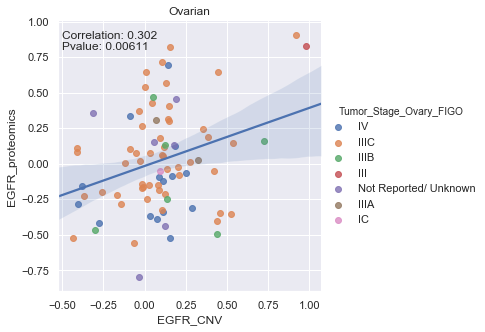

In [37]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "Tumor_Stage_Ovary_FIGO", ra_stats = True,title = "Ovarian", show_plot = True, save_file_name = "png_files/Step2Cis_Ovarian")

# Colon

In [38]:
prot_CNV = colon.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
mutation = colon.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
mutation

cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 01CO001.N, 01CO005.N, 01CO006.N, 01CO008.N, 01CO013.N, 01CO014.N, 01CO015.N, 01CO019.N, 01CO022.N, 05CO002.N, 05CO003.N, 05CO006.N, 05CO007.N, 05CO011.N, 05CO015.N, 05CO020.N, 05CO026.N, 05CO028.N, 05CO029.N, 05CO032.N, 05CO033.N, 05CO034.N, 05CO035.N, 05CO037.N, 05CO039.N, 05CO041.N, 05CO044.N, 05CO045, 05CO045.N, 05CO047.N, 05CO048.N, 05CO049.N, 05CO050.N, 05CO053.N, 05CO054.N, 06CO001.N, 06CO002.N, 09CO005.N, 09CO006.N, 09CO008.N, 09CO011.N, 09CO013.N, 09CO014.N, 09CO015.N, 09CO018.N, 09CO019.N, 09CO022.N, 11CO005.N, 11CO007.N, 11CO008.N, 11CO010.N, 11CO018.N, 11CO019.N, 11CO020.N, 11CO021.N, 11CO022.N, 11CO027.N, 11CO030.N, 11CO031.N, 11CO032.N, 11CO033.N, 11CO036.N, 11CO037.N, 11CO039.N, 11CO042.N, 11CO043.N, 11CO044.N, 11CO045.N, 11CO047.N, 11CO048.N, 11CO051.N, 11CO052.N, 11CO053.N, 11CO054.N, 11CO057.N, 11CO058.N, 11CO060.N, 11CO061.N, 11CO062.N, 11CO070.

Name,Sample_Tumor_Normal,Age,CEA,Gender,Lymphatic_Invasion,Mucinous,Perineural_Invasion,Polyps_History,Polyps_Present,Stage,Subsite,Synchronous_Tumors,Tumor.Status,Vascular_Invasion,Vital.Status,pathalogy_N_stage,pathalogy_T_stage
Patient_ID,,,,,,,,,,,,,,,,,
01CO001,Tumor,729.0,4.9,Male,Yes,Mucinous,No,No,No,Stage III,Sigmoid Colon,No,Tumor free,Yes,Living,N2b,T4a
01CO005,Tumor,838.0,1.0,Female,No,Not Mucinous,No,Yes,Yes,Stage II,Sigmoid Colon,No,Tumor free,No,Deceased,N0,T3
01CO006,Tumor,904.0,NaN,Female,Yes,Mucinous,Yes,No,No,Stage III,Ascending Colon,Yes,With tumor,Yes,Living,N2b,T4a
01CO008,Tumor,652.0,NaN,Female,No,Mucinous,No,No,Yes,Stage II,Descending Colon,No,With tumor,No,Living,N0,T3
01CO013,Tumor,695.0,NaN,Male,No,Not Mucinous,No,Yes,No,Stage I,Sigmoid Colon,No,Tumor free,No,Living,N0,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21CO006.N,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21CO007.N,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22CO004.N,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


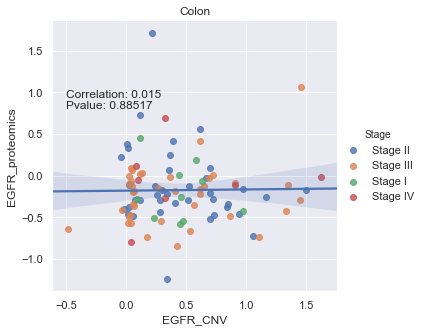

In [39]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics",hue = "Stage", ra_stats = True, title = "Colon", show_plot = True, save_file_name = "png_files/Step2Cis_Colon")


# Brca 

In [41]:
prot_CNV = brca.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV.columns = prot_CNV.columns.droplevel(1) #drop multi-index level
mutation = brca.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
mutation

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,Age.in.Month,Gender,Race,Human.Readable.Label,Experiment,Channel,Stage,PAM50,NMF.v2.1,ER,PR,ER.IHC.Score,PR.IHC.Score,Coring.or.Excision,Ischemia.Time.in.Minutes,Ischemia.Decade,Necrosis,Tumor.Cellularity,Total.Cellularity,In.CR,QC.status
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,NaN,NaN,black.or.african.american,CPT000814 0004,13,127C,Stage IIA,Basal,NaN,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC.pass
CPT001846,CPT001846,Tumor,NaN,NaN,white,CPT001846 0005,12,128C,Stage III,Basal,NaN,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC.pass
X01BR001,X01BR001,Tumor,660.0,female,black.or.african.american,[17]-af938b_D2,2,129N,Stage IIB,Basal,C4,negative,negative,0,0,coring,0.0,1.0,10.0,70.0,50.0,yes,QC.pass
X01BR008,X01BR008,Tumor,NaN,NaN,NaN,[cf]-467c39_D1,16,127C,NaN,Basal,C4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,90.0,60.0,no,QC.pass
X01BR009,X01BR009,Tumor,NaN,NaN,NaN,[0e]-051582_D1,16,127N,NaN,Basal,C4,negative,negative,NaN,NaN,NaN,NaN,NaN,0.0,80.0,70.0,no,QC.pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,X21BR001,Tumor,NaN,NaN,white,[1f]-d9108c,16,128N,NaN,LumB,C2,negative,negative,NaN,NaN,NaN,NaN,NaN,0.0,60.0,80.0,no,QC.pass
X21BR002,X21BR002,Tumor,NaN,NaN,white,[32]-22665e,16,128C,NaN,LumA,C2,positive,positive,NaN,NaN,NaN,NaN,NaN,0.0,65.0,60.0,no,QC.pass
X21BR010,X21BR010|X21BR010.REP1,Tumor,852.0,female,white,[68]-4d3e43_D2,3|17,129C|128C,Stage IIA,LumA,C1,positive,positive,3+,3+,excision,18.0,2.0,0.0,60.0,55.0,yes,QC.pass


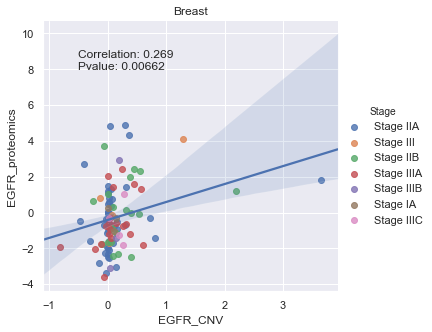

In [50]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "Stage", ra_stats = True, title = "Breast", show_plot = True, save_file_name = "png_files/Step2Cis_Brca")


# LUAD

In [52]:
prot_CNV = luad.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV.columns = prot_CNV.columns.droplevel(1) #drop multi-index level
mutation = luad.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
mutation

cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00001.N, C3L-00009.N, C3L-00080.N, C3L-00083.N, C3L-00093.N, C3L-00094.N, C3L-00095.N, C3L-00140.N, C3L-00144.N, C3L-00263.N, C3L-00279.N, C3L-00368.N, C3L-00412.N, C3L-00422.N, C3L-00510.N, C3L-00604.N, C3L-00893.N, C3L-00913.N, C3L-00973.N, C3L-01330.N, C3L-01632.N, C3L-01682.N, C3L-01683.N, C3L-01889.N, C3L-01890, C3L-01890.N, C3L-01924.N, C3L-02219.N, C3L-02345.N, C3L-02348.N, C3L-02350.N, C3L-02365.N, C3L-02508.N, C3L-02549.N, C3N-00167.N, C3N-00169.N, C3N-00175.N, C3N-00180.N, C3N-00199.N, C3N-00203.N, C3N-00217.N, C3N-00223.N, C3N-00293.N, C3N-00433.N, C3N-00546.N, C3N-00547.N, C3N-00549.N, C3N-00550.N, C3N-00551.N, C3N-00552.N, C3N-00556.N, C3N-00559.N, C3N-00560.N, C3N-00572.N, C3N-00574.N, C3N-00578.N, C3N-00579.N, C3N-00580.N, C3N-00704.N, C3N-00737.N, C3N-00738.N, C3N-00959.N, C3N-01016.N, C3N-01021.N, C3N-01023.N, C3N-01024.N, C3N-01030.N, C3N-01

Name,Sample.IDs,Sample_Tumor_Normal,Smoking.Status,Stage,Region.of.Origin,Country.of.Origin,Age,Gender,Ethnicity,Height.cm,Weight.kg,BMI,Cigarettes.per.Day,Pack.Years.Smoked,Smoking.History,Secondhand.Smoke
Patient_ID,,,,,,,,,,,,,,,,
C3L-00001,C3L.00001,Tumor,non-smoker,2A,western,usa,61.0,female,caucasian,180.3,71.6,22.03,NaN,NaN,Lifelong non-smoker: Less than 100 cigarettes ...,Yes
C3L-00009,C3L.00009,Tumor,smoker,1A,western,usa,76.0,male,caucasian,172.0,85.0,28.67,20.0,62.0,Current smoker: Includes daily and non-daily s...,Exposure to secondhand smoke history not avail...
C3L-00080,C3L.00080,Tumor,smoker,1B,western,other,58.0,male,caucasian,170.0,88.5,30.62,20.0,40.0,Current smoker: Includes daily and non-daily s...,Exposure to secondhand smoke history not avail...
C3L-00083,C3L.00083,Tumor,NaN,1B,western,usa,71.0,male,caucasian,177.0,92.0,29.37,NaN,NaN,Smoking history not available,Exposure to secondhand smoke history not avail...
C3L-00093,C3L.00093,Tumor,non-smoker,1B,western,usa,66.0,female,caucasian,157.0,84.0,34.08,NaN,NaN,Lifelong non-smoker: Less than 100 cigarettes ...,Exposure to secondhand smoke history not avail...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-02582.N,C3N.02582.N,Normal,smoker,NaN,asian,china,77.0,male,han,177.0,73.0,23.30,20.0,NaN,"Current reformed smoker, years unknown",Exposure to secondhand smoke history not avail...
C3N-02586.N,C3N.02586.N,Normal,smoker,NaN,asian,china,73.0,male,han,176.0,74.0,23.89,20.0,41.0,"Current reformed smoker, more than 15 years",Exposure to secondhand smoke history not avail...
C3N-02587.N,C3N.02587.N,Normal,non-smoker,NaN,asian,china,59.0,female,han,151.0,50.0,21.93,NaN,NaN,Lifelong non-smoker: Less than 100 cigarettes ...,Exposure to secondhand smoke history not avail...


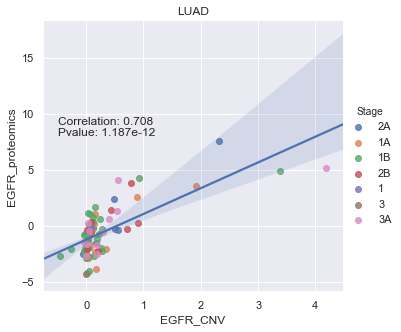

In [58]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = 'Stage', title = "LUAD", ra_stats = True, show_plot = True, save_file_name = "png_files/Step2Cis_Luad")


# HNSCC

In [59]:
prot_CNV = Hnscc.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
mutation = Hnscc.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
mutation

cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00994.C, C3L-00994.N, C3L-00995.N, C3L-00997.N, C3L-00999.N, C3L-01237.N, C3L-02617, C3L-02617.C, C3L-02617.N, C3L-02621.N, C3L-02651.N, C3L-03378.N, C3L-04350.C, C3L-04354.N, C3L-04844.N, C3L-05257.C, C3N-00204.N, C3N-00295.N, C3N-00306.N, C3N-00307.N, C3N-00498.N, C3N-00519.N, C3N-00829.N, C3N-00857.N, C3N-01337.N, C3N-01338.N, C3N-01340.N, C3N-01620.N, C3N-01645.N, C3N-01754.N, C3N-01756.N, C3N-01757.C, C3N-01758.N, C3N-01858.N, C3N-01859.N, C3N-01943.N, C3N-01944.N, C3N-01946.N, C3N-01947.N, C3N-02279.N, C3N-02693.N, C3N-02713.N, C3N-02714.N, C3N-02727, C3N-03008.N, C3N-03011.N, C3N-03012.N, C3N-03013.N, C3N-03015.N, C3N-03027.N, C3N-03028.N, C3N-03042.C, C3N-03045.N, C3N-03488.N, C3N-03490.N, C3N-03619.N, C3N-03620.N, C3N-03781.N, C3N-03837.N, C3N-03841.N, C3N-03849.N, C3N-03876.N, C3N-03878.N, C3N-03888.N, C3N-03928.N, C3N-03933.N, C3N-04275.N, C3N-0427

Name,Sample_Tumor_Normal,Cored_Sample,P16,age,alcohol_consum,clinic_staging_dist_metas,country,follow_up_days,follow_up_is_contact,follow_up_vital_status,gender,histologic_grade,histologic_type,num_pack_years_sm,num_smoke_per_day,num_yrs_alc_con,patho_staging_curated,patho_staging_orignial,patho_staging_pn,patho_staging_pt,smoke_age_start,smoke_age_stop,smoking_history,smoking_inferred_binary,smoking_second_hand,tumor_focality,tumor_necrosis,tumor_site_curated,tumor_site_original,tumor_size_cm
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C3L-00977,Tumor,False,Not Evaluated,56.0,Lifelong non-drinker,cM0,Russia,377.0,No,Living,Male,G1 Well differentiated,"Squamous cell carcinoma, conventional",NaN,20,NaN,Stage III,Stage III,pN1,pT1,NaN,NaN,"Current reformed smoker, years unknown",strong_evidence,Yes,Unifocal,Not identified,Oral cavity,Floor of mouth,1.2
C3L-00987,Tumor,False,Not Evaluated,61.0,"Consumed alcohol in the past, but currently a ...",cM0,Ukraine,429.0,Yes,Living,Male,G2 Moderately differentiated,"Squamous cell carcinoma, conventional",43.0,20,30,Stage III,Stage III,pN1,pT2,18,NaN,Current smoker: Includes daily and non-daily s...,strong_evidence,Yes,Unifocal,Present,Oral cavity,Tongue,4.0
C3L-00994,Tumor,False,Not Evaluated,50.0,Alcohol consumption more than 2 drinks per day...,cM0,Ukraine,132.0,No,Deceased,Male,G2 Moderately differentiated,"Squamous cell carcinoma, conventional",10.2,6,32,Stage II,Stage II,pN0,pT2,16,50,Current reformed smoker within past 15 years,strong_evidence,Exposure to secondhand smoke history not avail...,Unifocal,Present,Oral cavity,Tongue,3.0
C3L-00995,Tumor,False,Not Evaluated,56.0,Alcohol consumption more than 2 drinks per day...,cM0,Ukraine,-10.0,No,Deceased,Male,G1 Well differentiated,"Squamous cell carcinoma, conventional",31.0,20,31,Stage III,Stage III,pN1,pT2,25,56,"Current reformed smoker, more than 15 years",weak_evidence,Exposure to secondhand smoke history not avail...,Unifocal,Not identified,Oral cavity,Buccal mucosa,4.0
C3L-00997,Tumor,False,Not Evaluated,47.0,Lifelong non-drinker,cM0,Ukraine,442.0,Yes,Living,Male,G2 Moderately differentiated,"Squamous cell carcinoma, conventional",15.0,20,NaN,Stage II,Stage III,pN1,pT2,12,27,"Current reformed smoker, more than 15 years",strong_evidence,Yes,Unifocal,Present,Oropharynx,Oropharynx,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-04276.N,Normal,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3N-04277.N,Normal,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3N-04278.N,Normal,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


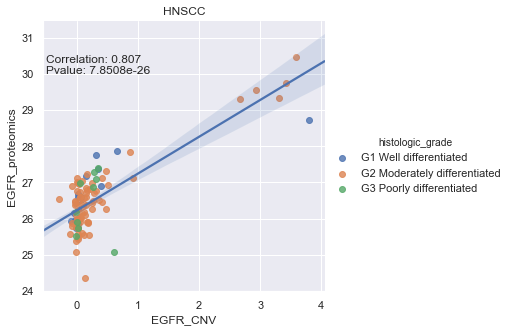

In [67]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "histologic_grade", title = "HNSCC", ra_stats = True, show_plot = True, save_file_name = "png_files/Step2Cis_Hnscc")


# LSCC

In [68]:
prot_CNV = Lscc.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV.columns = prot_CNV.columns.droplevel(1) #drop multi-index level
mutation = Lscc.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]
mutation

cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00081.N, C3L-00415.N, C3L-00445.N, C3L-00568.N, C3L-00603.N, C3L-00904.N, C3L-00923.N, C3L-00927.N, C3L-00993.N, C3L-01000.N, C3L-01285.N, C3L-01455.N, C3L-01606.N, C3L-01663.N, C3L-01884.N, C3L-02127.N, C3L-02130.N, C3L-02163.N, C3L-02164.N, C3L-02168.N, C3L-02349.N, C3L-02358.N, C3L-02546.N, C3L-02552.N, C3L-02619.N, C3L-02624.N, C3L-02625.N, C3L-02627.N, C3L-02629.N, C3L-02646.N, C3L-02648.N, C3L-02649.N, C3L-02650.N, C3L-02660.N, C3L-02665.N, C3L-02669.N, C3L-02891.N, C3L-02951.N, C3L-02963.N, C3L-02964.N, C3L-02968.N, C3L-02969.N, C3L-03272.N, C3L-03961.N, C3L-03962.N, C3L-03963.N, C3L-03965.N, C3L-04013.N, C3L-04014.N, C3L-04071.N, C3L-04391.N, C3N-00221.N, C3N-00497.N, C3N-00555.N, C3N-01017.N, C3N-01018.N, C3N-01020.N, C3N-01025.N, C3N-01028.N, C3N-01194.N, C3N-01411.N, C3N-01846.N, C3N-01892.N, C3N-01893.N, C3N-02252.N, C3N-02285.N, C3N-02288.N, C3N-

Name,Sample_Tumor_Normal,Aliquot,Smoking.History,Stage,Country.of.Origin,Age,Gender,Ethnicity,Cigarettes.per.Day,Pack.Years.Smoked,Secondhand.Smoke,Number.non.synom.somatic.mutations
Patient_ID,,,,,,,,,,,,
C3L-00081,Tumor,CPT0001020003,Lifelong non-smoker: Less than 100 cigarettes ...,IIA,usa,61,female,caucasian,NaN,NaN,Exposure to secondhand smoke history not avail...,249
C3L-00415,Tumor,CPT0010050003,Current reformed smoker within past 15 years,IIA,usa,64,female,caucasian,20,35,Exposure to secondhand smoke history not avail...,129
C3L-00445,Tumor,CPT0130410003,Current reformed smoker within past 15 years,IIA,bulgaria,74,male,caucasian,20,40,Yes,147
C3L-00503,Tumor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00568,Tumor,CPT0023470003,Current reformed smoker within past 15 years,IB,usa,74,female,caucasian,20,39,Exposure to secondhand smoke history not avail...,223
...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-03886.N,Normal,CPT0221660003,Lifelong non-smoker: Less than 100 cigarettes ...,IB,ukraine,60,male,slavic,NaN,NaN,Exposure to secondhand smoke history not avail...,NaN
C3N-04124.N,Normal,CPT0237990003,Current smoker: Includes daily and non-daily s...,IB,china,62,male,han,20,19,Exposure to secondhand smoke history not avail...,NaN
C3N-04127.N,Normal,CPT0238130003,Current smoker: Includes daily and non-daily s...,IIIA,china,63,male,han,30,58.5,Exposure to secondhand smoke history not avail...,NaN


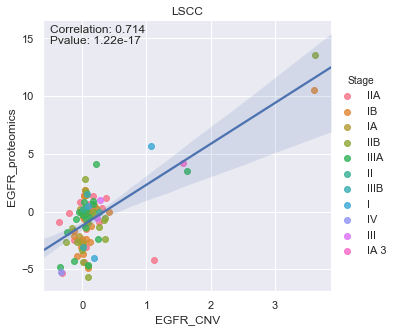

In [72]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "Stage", title = "LSCC" , ra_stats = True, show_plot = True, save_file_name = "png_files/Step2Cis_Lscc")
